In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline



## Loading Datasets


In [2]:
confirmed_cases = pd.read_csv('time_series_covid_19_confirmed.csv')

In [3]:
deaths_reported = pd.read_csv('time_series_covid_19_deaths.csv')

In [4]:
recoverd_cases = pd.read_csv('time_series_covid_19_recovered.csv')

### Displaying sample of dataset 

In [5]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,41975,42033,42092,42297,42463,42609,42795,42969,43035,43240
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451


In [6]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1554,1556,1558,1574,1577,1581,1591,1595,1605,1617
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,549,557,559,571,579,590,598,605,612,623
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2024,2036,2048,2062,2077,2093,2111,2124,2139,2154
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,76
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,300,303,307,308,308,312,315,317,322,322


In [7]:
recoverd_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34440,34446,34458,34721,34954,34967,35024,35036,35067,35092
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11861,12002,12092,12203,12353,12493,12574,12667,12767,12889
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,41510,41783,42037,42325,42626,42980,42980,43779,44199,44633
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3858,4043,4248,4332,4405,4488,4585,4675,4675,4747
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5626,5647,5899,5927,6036,6125,6250,6326,6345,6444


### Extracting all the columns using the key()

In [8]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '11/6/20', '11/7/20', '11/8/20', '11/9/20', '11/10/20', '11/11/20',
       '11/12/20', '11/13/20', '11/14/20', '11/15/20'],
      dtype='object', length=303)

## Preprocessing
### Extracting only the dates columns that have information of confirmed, deaths and recovered cases

In [9]:
confirmed = confirmed_cases.loc[:,cols[4]:cols[-1]]

In [10]:
deaths = deaths_reported.loc[:,cols[4]:cols[-1]]

In [11]:
recoveries = recoverd_cases.loc[:,cols[4]:cols[-1]]


### Now checking

In [12]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,0,0,0,0,0,0,0,0,0,0,...,41975,42033,42092,42297,42463,42609,42795,42969,43035,43240
1,0,0,0,0,0,0,0,0,0,0,...,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830
2,0,0,0,0,0,0,0,0,0,0,...,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679
3,0,0,0,0,0,0,0,0,0,0,...,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872
4,0,0,0,0,0,0,0,0,0,0,...,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451


### Creating four lists and appending total confirmed, death and recovered cases  

In [13]:
# total mortality rate = all death / all confirmed cases

dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recoverd_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recoverd_sum)

### Now Checking

In [14]:
confirmed_sum

54370186

In [15]:
death_sum

1317139

In [16]:
recoverd_sum

34955148

In [17]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30803,
 34396,
 37130,
 40160,
 42769,
 44811,
 45229,
 60382,
 66909,
 69051,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79546,
 80399,
 81376,
 82736,
 84121,
 86014,
 88397,
 90375,
 92959,
 95276,
 98040,
 102040,
 106102,
 110062,
 114025,
 119036,
 126717,
 132506,
 146887,
 157965,
 169258,
 184002,
 199933,
 219466,
 246622,
 277257,
 309226,
 343464,
 386832,
 428304,
 479288,
 542014,
 607005,
 674387,
 733786,
 799023,
 875852,
 952378,
 1033709,
 1116962,
 1197316,
 1269293,
 1342527,
 1420267,
 1504298,
 1590779,
 1678319,
 1754535,
 1849888,
 1920033,
 1991379,
 2073252,
 2170173,
 2257986,
 2331380,
 2411352,
 2485855,
 2561734,
 2639753,
 2727810,
 2812183,
 2895430,
 2967570,
 3037260,
 3112744,
 3190206,
 3273554,
 3360744,
 3440791,
 3517314,
 3594392,
 3674847,
 3764761,
 3853781,
 3944952,
 4029875,
 4105071,
 4181946,
 4266204,
 4351024

### Representing dates & cases in the form of Numpy Array

In [18]:
days_since_1_22_20 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths= np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [19]:
days_since_1_22_20

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [20]:
world_cases

array([[     555],
       [     654],
       [     941],
       [    1434],
       [    2118],
       [    2927],
       [    5578],
       [    6167],
       [    8235],
       [    9927],
       [   12038],
       [   16787],
       [   19887],
       [   23898],
       [   27643],
       [   30803],
       [   34396],
       [   37130],
       [   40160],
       [   42769],
       [   44811],
       [   45229],
       [   60382],
       [   66909],
       [   69051],
       [   71235],
       [   73270],
       [   75152],
       [   75652],
       [   76212],
       [   76841],
       [   78602],
       [   78982],
       [   79546],
       [   80399],
       [   81376],
       [   82736],
       [   84121],
       [   86014],
       [   88397],
       [   90375],
       [   92959],
       [   95276],
       [   98040],
       [  102040],
       [  106102],
       [  110062],
       [  114025],
       [  119036],
       [  126717],
       [  132506],
       [  146887],
       [  15

In [21]:
total_deaths

array([[     17],
       [     18],
       [     26],
       [     42],
       [     56],
       [     82],
       [    131],
       [    133],
       [    171],
       [    213],
       [    259],
       [    362],
       [    426],
       [    492],
       [    564],
       [    634],
       [    719],
       [    806],
       [    906],
       [   1013],
       [   1113],
       [   1118],
       [   1371],
       [   1523],
       [   1666],
       [   1770],
       [   1868],
       [   2008],
       [   2123],
       [   2248],
       [   2252],
       [   2459],
       [   2470],
       [   2630],
       [   2710],
       [   2771],
       [   2814],
       [   2873],
       [   2942],
       [   2996],
       [   3085],
       [   3160],
       [   3255],
       [   3348],
       [   3460],
       [   3559],
       [   3803],
       [   3987],
       [   4267],
       [   4611],
       [   4917],
       [   5414],
       [   5834],
       [   6475],
       [   7153],
       [  

In [22]:
total_recovered

array([[      28],
       [      30],
       [      36],
       [      39],
       [      52],
       [      61],
       [     107],
       [     126],
       [     143],
       [     222],
       [     284],
       [     472],
       [     623],
       [     852],
       [    1124],
       [    1487],
       [    2011],
       [    2616],
       [    3244],
       [    3946],
       [    4683],
       [    5150],
       [    6295],
       [    8058],
       [    9395],
       [   10865],
       [   12583],
       [   14352],
       [   16121],
       [   18177],
       [   18890],
       [   22886],
       [   23394],
       [   25227],
       [   27905],
       [   30384],
       [   33277],
       [   36711],
       [   39782],
       [   42716],
       [   45602],
       [   48228],
       [   51170],
       [   53796],
       [   55865],
       [   58359],
       [   60694],
       [   62493],
       [   64404],
       [   67002],
       [   68324],
       [   70251],
       [   7

### Out break predection for next 15 days

In [23]:
days_in_future = 15
future_forecast = np.array([i for i in range(len(dates)+ days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[: -15]

In [24]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

### For better understanding converting all the integers into datetime

In [25]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

###  Visualization with the latest data of 15th November

In [26]:
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recoverd_cases[dates[-1]]

In [27]:
latest_confirmed

0         43240
1         27830
2         67679
3          5872
4         13451
5           134
6       1310491
7        117337
8           114
9          4498
10           46
11         1185
12          544
13          230
14        20345
15          787
16       203956
17        75688
18         7186
19        84703
20       432333
21          250
22       114185
23       535939
24         4861
25         2844
26          375
27       143246
28        71956
29         8225
         ...   
239          30
240        2675
241        6080
242       80404
243      414278
244    11036935
245       16020
246      551533
247      150345
248           3
249         222
250          71
251         254
252        1003
253          15
254         902
255         363
256          13
257         720
258     1369318
259        4030
260       70243
261           1
262       97352
263        1281
264       63031
265          10
266        2072
267       17123
268        8829
Name: 11/15/20, Length: 

In [28]:
latest_deaths

0        1617
1         623
2        2154
3          76
4         322
5           4
6       35436
7        1763
8           3
9          53
10          0
11          6
12          4
13         13
14        819
15          9
16       1829
17        967
18        156
19        334
20       6194
21          7
22       1046
23      14421
24         90
25         43
26          0
27       8849
28       1889
29         27
        ...  
239         0
240        61
241       112
242      2345
243     11507
244    246214
245       145
246      9904
247       530
248         0
249         9
250         1
251         1
252        48
253         0
254         1
255        25
256         1
257         6
258     51934
259        65
260       598
261         0
262       851
263        35
264       565
265         1
266       605
267       353
268       257
Name: 11/15/20, Length: 269, dtype: int64

In [29]:
latest_recoveries

0        35092
1        12889
2        44633
3         4747
4         6444
5          127
6      1129102
7        74984
8          111
9         3156
10          38
11        1171
12         495
13         217
14       19523
15         757
16      125674
17       55150
18        5323
19       82469
20      349542
21         238
22       95843
23           0
24        2598
25        2515
26         355
27      117137
28       35606
29        5559
        ...   
226         30
227       1920
228       5402
229      54362
230     353663
231    4174884
232       8038
233     251864
234     143252
235          3
236        189
237         70
238        240
239        816
240         13
241        754
242        329
243         12
244        695
245          0
246       3233
247      67526
248          0
249      92373
250       1103
251      54346
252          8
253       1394
254      16137
255       8096
Name: 11/15/20, Length: 256, dtype: int64

### List of Unique Countries

In [30]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

 ### Total no. of confirmed cases by each country

In [31]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region'] == i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_countries,country_confirmed_cases), key = operator.itemgetter(1),reverse= True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region'] == unique_countries[i]].sum()


In [32]:
print('Confirmed Cases by Countries/Regions: ')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]} : {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions: 
US : 11036935 cases
India : 8845127 cases
Brazil : 5863093 cases
France : 1915713 cases
Russia : 1910149 cases
Spain : 1458591 cases
United Kingdom : 1372884 cases
Argentina : 1310491 cases
Colombia : 1198746 cases
Italy : 1178529 cases
Mexico : 1006522 cases
Peru : 934899 cases
Germany : 802946 cases
Iran : 762068 cases
South Africa : 751024 cases
Poland : 712972 cases
Ukraine : 551533 cases
Belgium : 535939 cases
Chile : 531273 cases
Iraq : 519152 cases
Indonesia : 467113 cases
Czechia : 460116 cases
Netherlands : 454961 cases
Bangladesh : 432333 cases
Turkey : 414278 cases
Philippines : 407838 cases
Romania : 360281 cases
Pakistan : 359032 cases
Saudi Arabia : 353255 cases
Israel : 323741 cases
Canada : 299422 cases
Morocco : 293177 cases
Switzerland : 257135 cases
Portugal : 217301 cases
Nepal : 209776 cases
Austria : 203956 cases
Ecuador : 180295 cases
Sweden : 177355 cases
United Arab Emirates : 150345 cases
Panama : 146653 cases
Jordan : 14

### List of unique provinces

In [33]:
unique_provinces = list(confirmed_cases['Province/State'].unique())


### The number of confirmed cases per province, state or city

In [34]:
province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State'] == i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_provinces.remove(i)

In [35]:
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]} : {province_confirmed_cases[i]} cases')

Australian Capital Territory : 114 cases
New South Wales : 4498 cases
Northern Territory : 46 cases
Queensland : 1185 cases
South Australia : 544 cases
Tasmania : 230 cases
Victoria : 20345 cases
Western Australia : 787 cases
Alberta : 39329 cases
British Columbia : 20986 cases
Grand Princess : 13 cases
Manitoba : 10947 cases
New Brunswick : 367 cases
Newfoundland and Labrador : 303 cases
Northwest Territories : 15 cases
Nova Scotia : 1144 cases
Ontario : 97371 cases
Prince Edward Island : 68 cases
Quebec : 123854 cases
Saskatchewan : 5001 cases
Yukon : 24 cases
Anhui : 992 cases
Beijing : 947 cases
Chongqing : 589 cases
Fujian : 461 cases
Gansu : 181 cases
Guangdong : 1968 cases
Guangxi : 260 cases
Guizhou : 147 cases
Hainan : 171 cases
Hebei : 373 cases
Heilongjiang : 949 cases
Henan : 1288 cases
Hong Kong : 5458 cases
Hubei : 68148 cases
Hunan : 1020 cases
Inner Mongolia : 307 cases
Jiangsu : 677 cases
Jiangxi : 935 cases
Jilin : 157 cases
Liaoning : 288 cases
Macau : 46 cases
Ningx

### Handling missing values

In [36]:
nan_indices = []
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)
           
unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

### Bar graph plot of toatl confirmed cases across globe

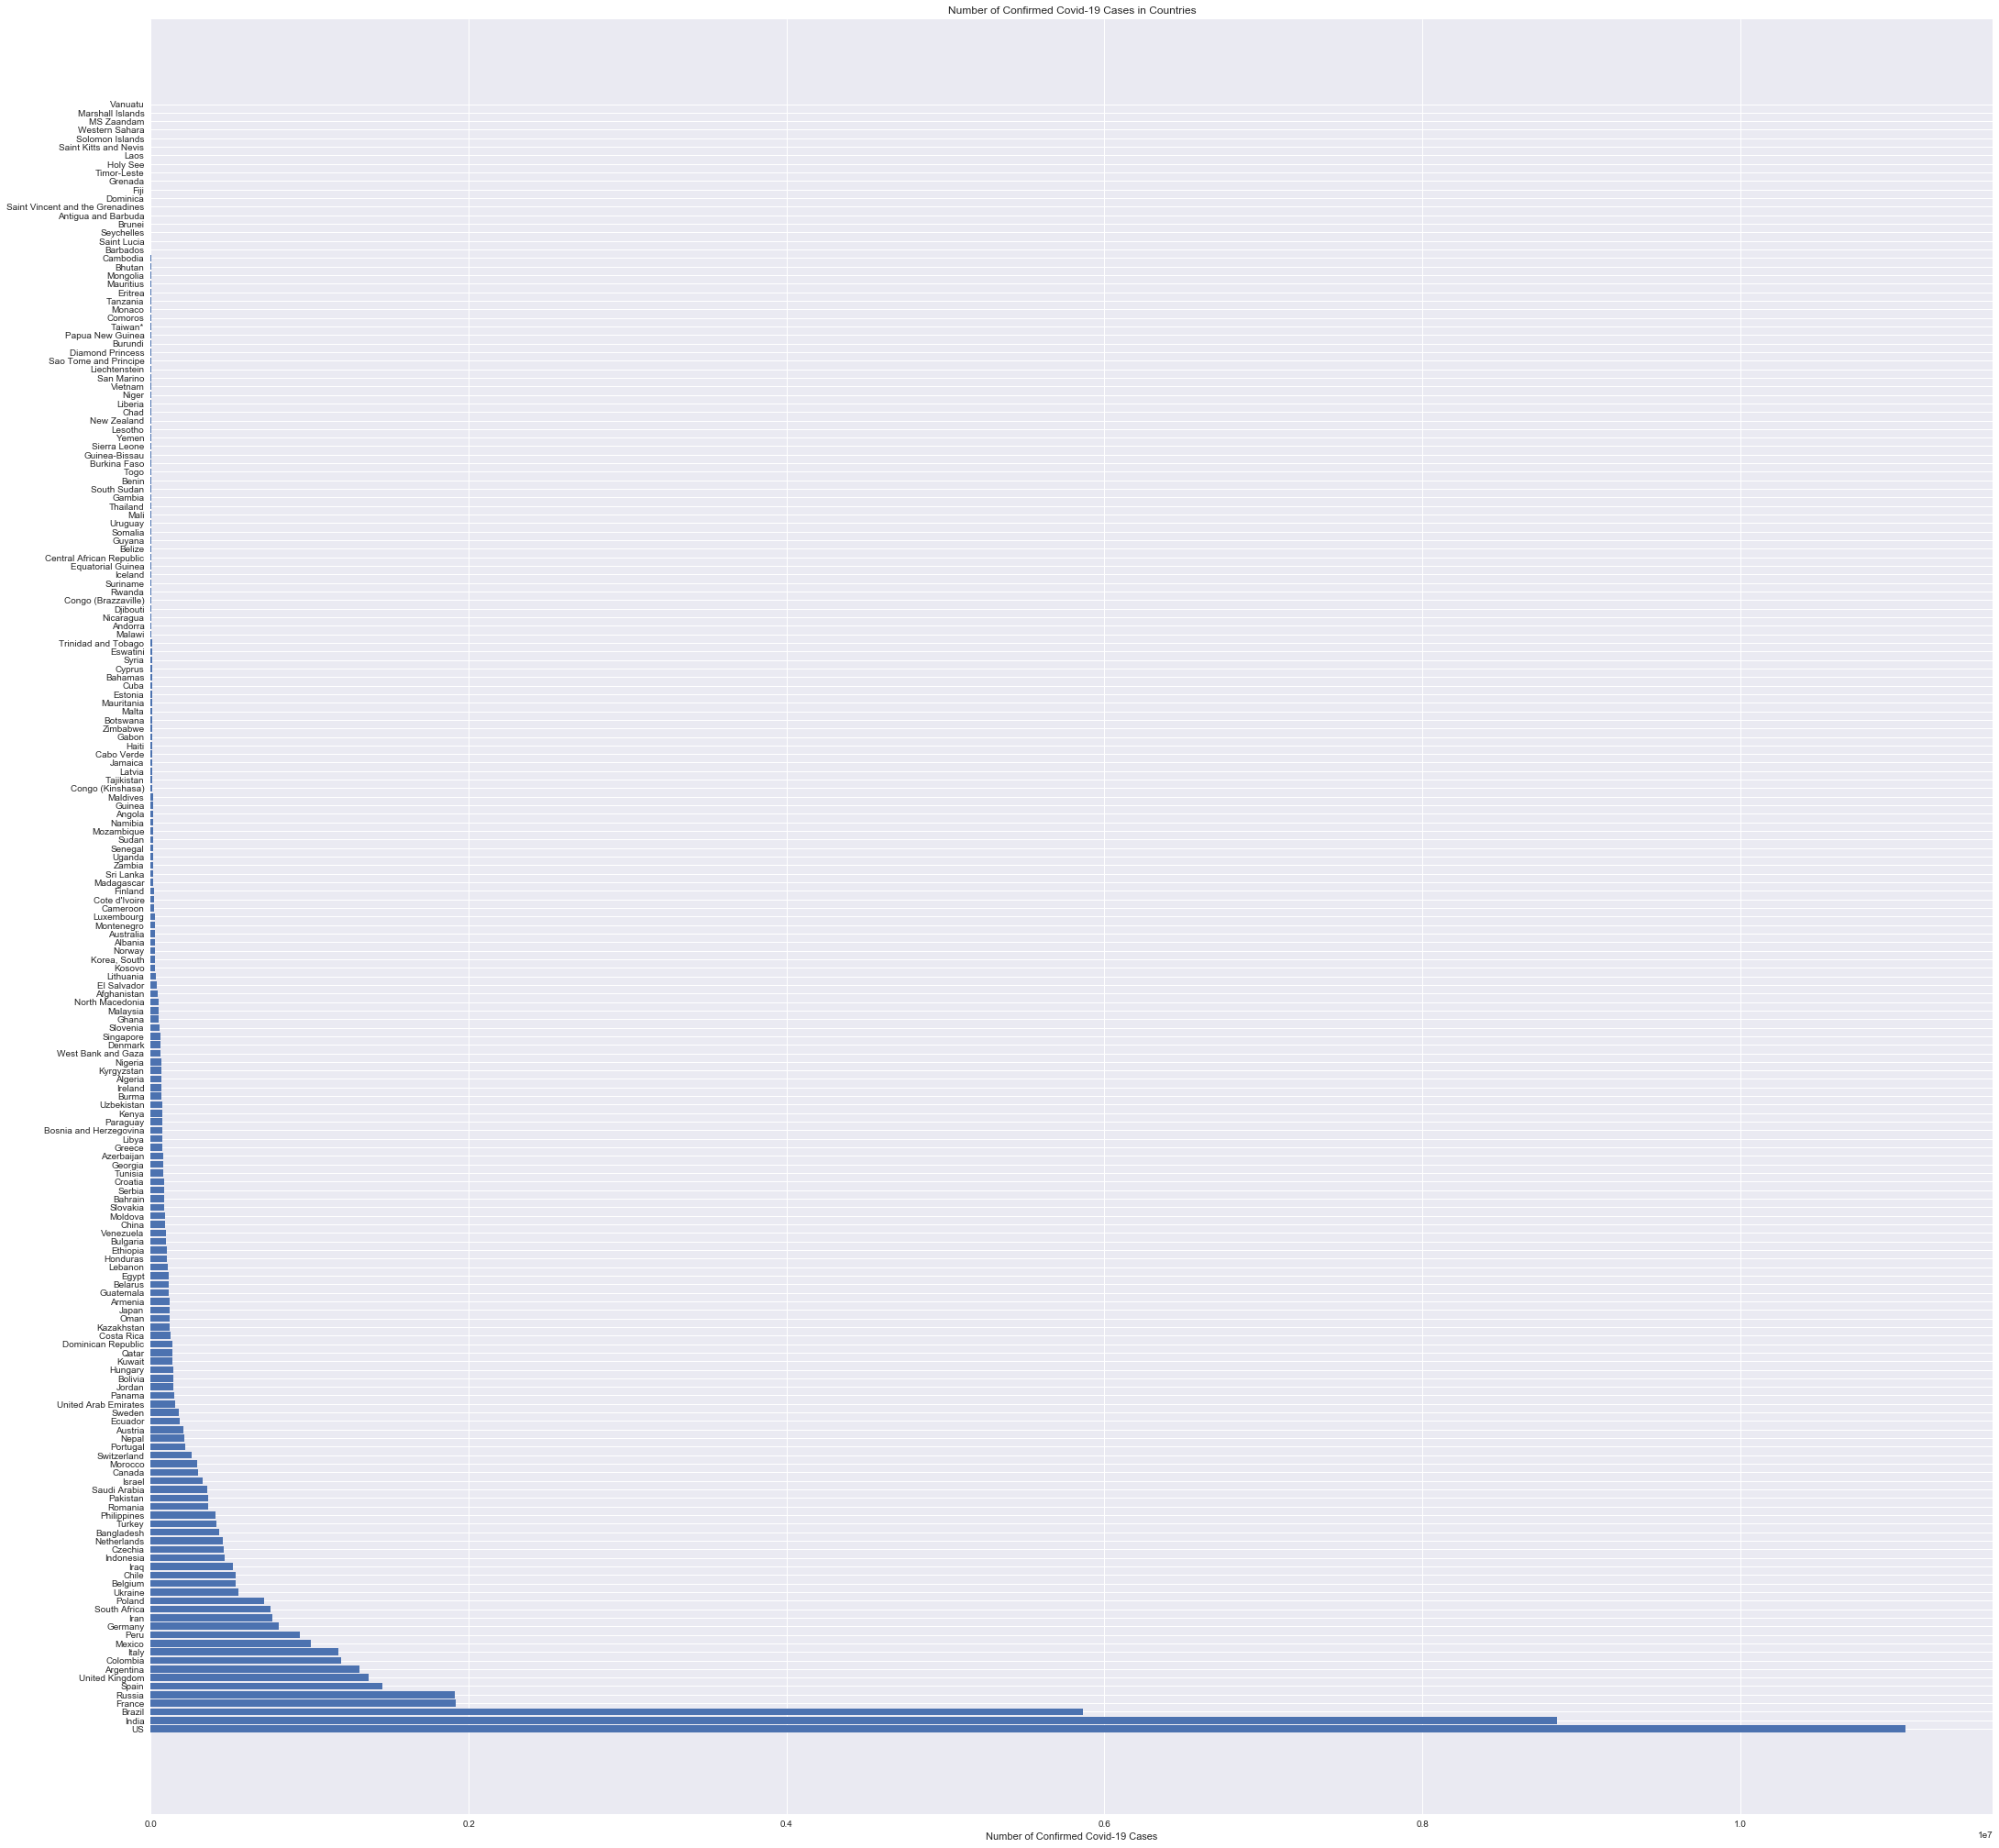

In [37]:
plt.figure(figsize=(36,36))
plt.barh(unique_countries,country_confirmed_cases)
plt.title('Number of Confirmed Covid-19 Cases in Countries')
plt.xlabel('Number of Confirmed Covid-19 Cases')
plt.show()

### Total confirmed cases China vs World


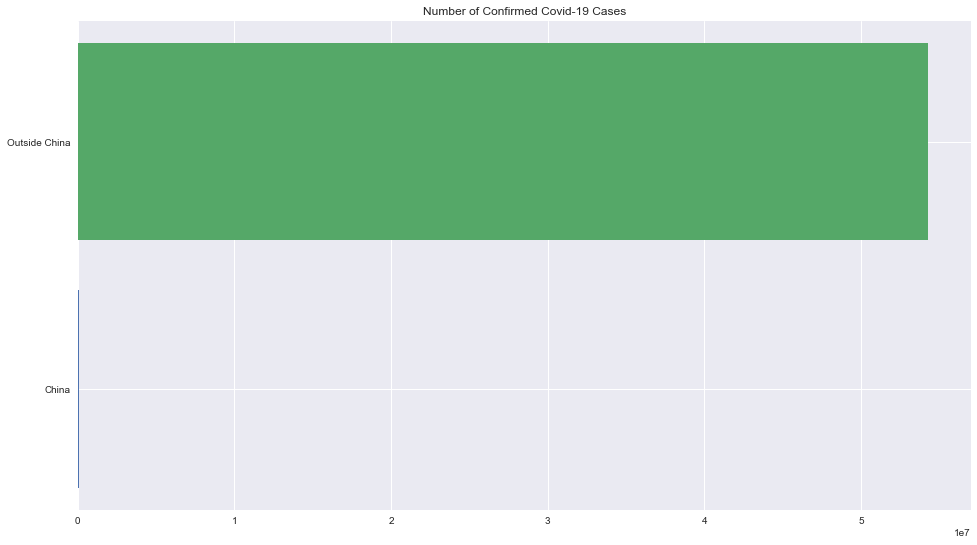

In [38]:
china_confirmed = latest_confirmed[confirmed_cases['Country/Region'] == 'China'].sum()
outside_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16,9))
plt.barh('China', china_confirmed)
plt.barh('Outside China', outside_china_confirmed)
plt.title('Number of Confirmed Covid-19 Cases')
plt.show()


### Pie plot  of China vs rest of world

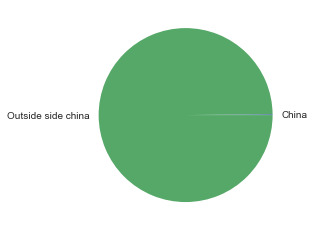

In [39]:
places = ['China', 'Outside side china']
data = [china_confirmed,outside_china_confirmed]
plt.pie(data, labels = places)
plt.show()

In [40]:
print('Outside China : {} cases'.format(outside_china_confirmed))
print('China : {} cases'.format(china_confirmed))
print('Total : {} cases'.format(china_confirmed + outside_china_confirmed))

Outside China : 54278336 cases
China : 91850 cases
Total : 54370186 cases


### Total Confirmed cases India vs Others

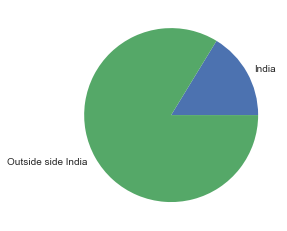

In [41]:
india_confirmed = latest_confirmed[confirmed_cases['Country/Region'] == 'India'].sum()
outside_india = np.sum(country_confirmed_cases) - india_confirmed
places = ['India', 'Outside side India']
data = [india_confirmed,outside_india]
plt.pie(data, labels = places)
plt.show()

### Top 10 Countries having worst effected 

In [42]:
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

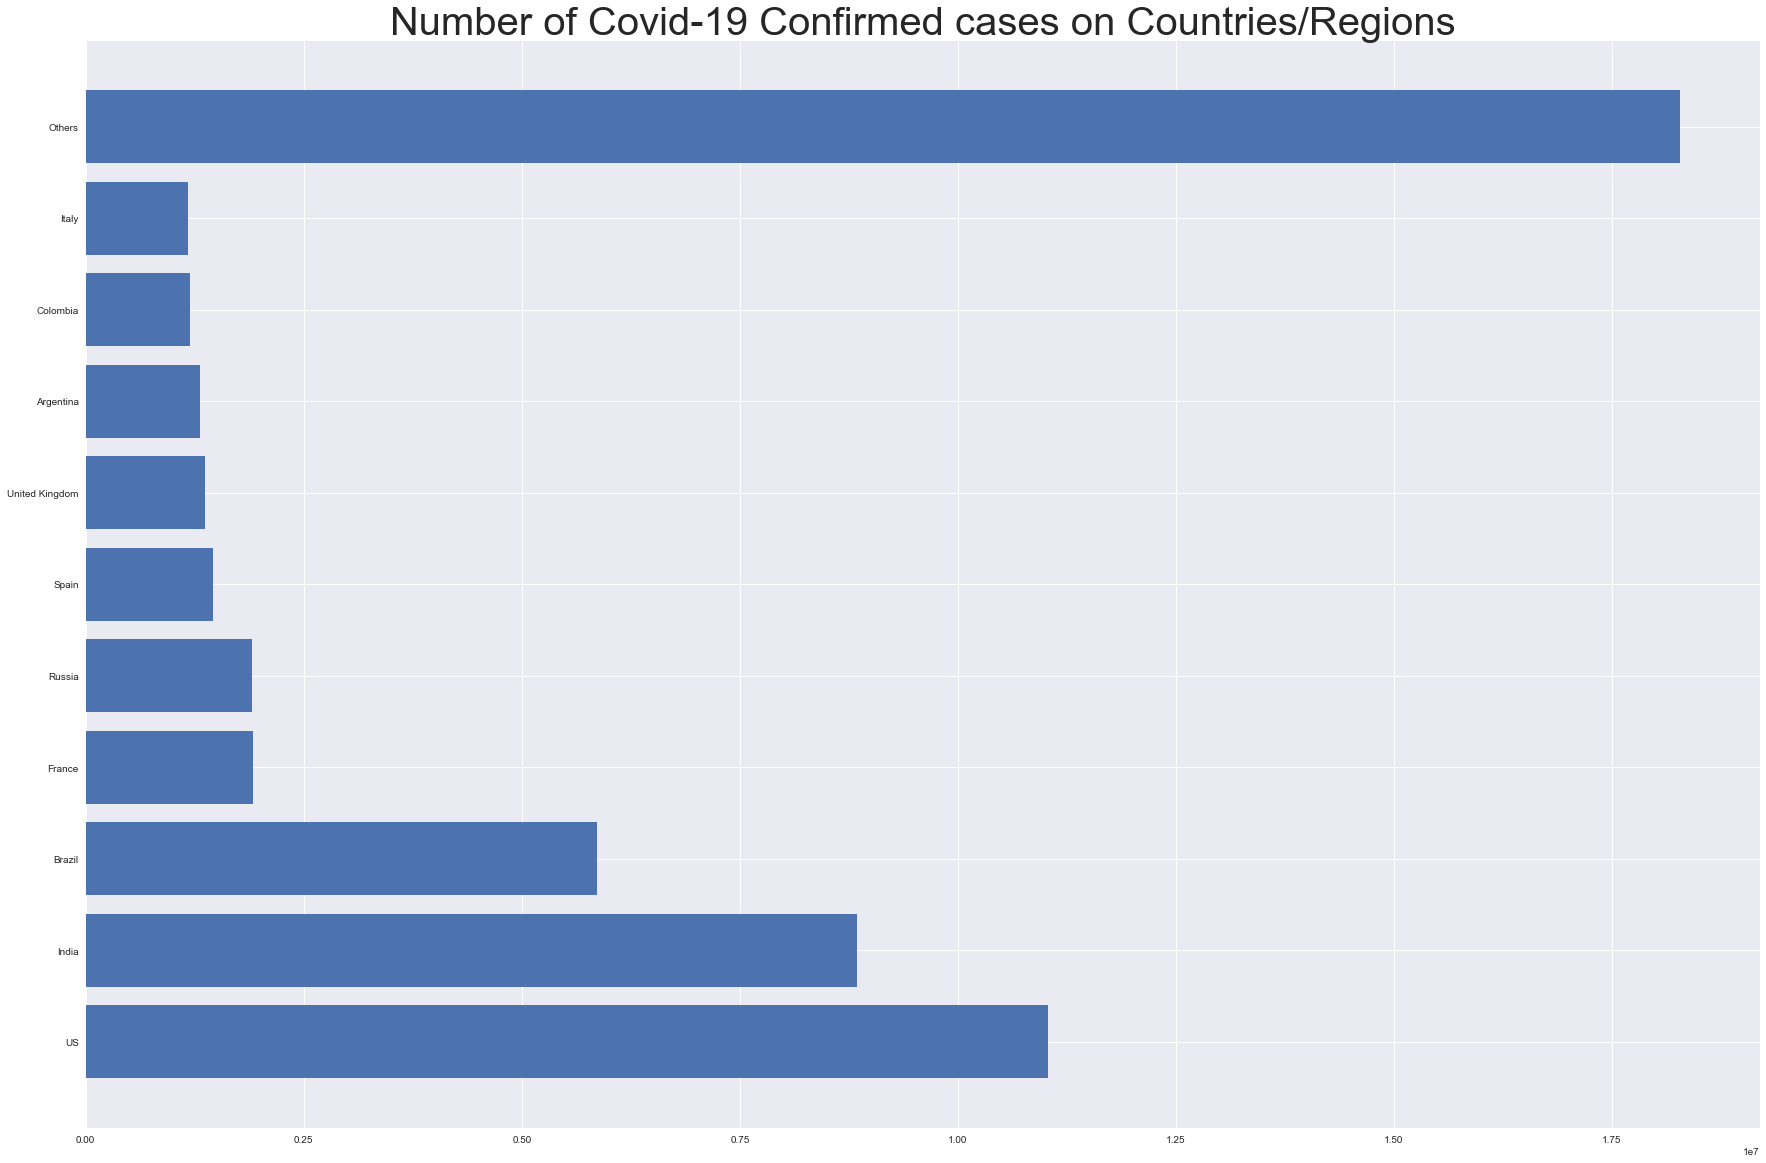

In [43]:
# visualation

plt.figure(figsize = (30,20))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed cases on Countries/Regions', size = 40)
plt.show()


### Pie Plot of confirmed cases in differnt countries

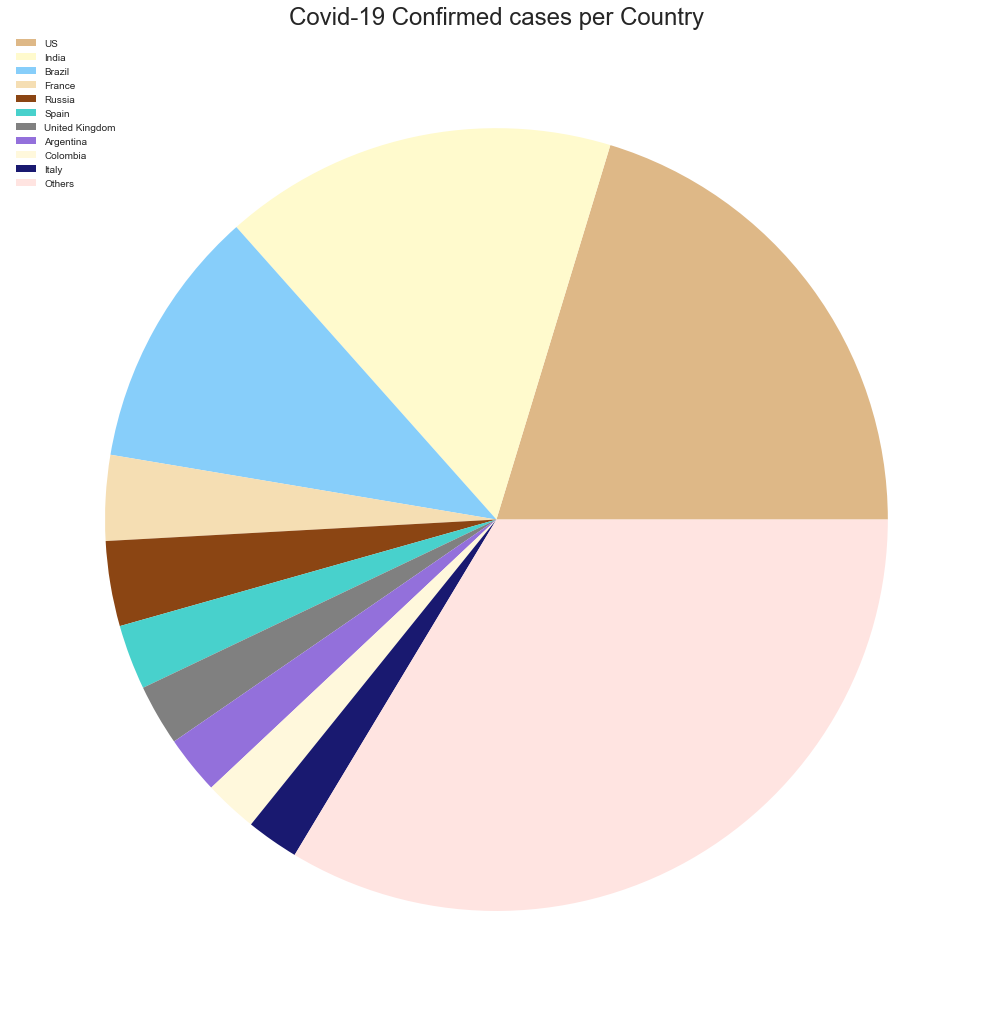

In [44]:
c = random.choices(list(mcolors.CSS4_COLORS.values()), k = len(unique_countries))
plt.figure(figsize=(18,18))
plt.title('Covid-19 Confirmed cases per Country', size = 24)
plt.pie(visual_confirmed_cases, colors = c)
plt.legend(visual_unique_countries, loc = 'best')
plt.show()

### Building SVM model

In [45]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22_20, world_cases, test_size=0.15, shuffle=False)

In [46]:
kernel = ['poly','sigmoid','rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel':kernel, 'C': c, 'gamma' : gamma, 'epsilon' : epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv = 3 , return_train_score=True, n_jobs= -1, n_iter= 13, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 13 candidates, totalling 39 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:  7.2min finished
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=13, n_jobs=-1,
          param_distributions={'kernel': ['poly', 'sigmoid', 'rbf'], 'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1], 'shrinking': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

In [47]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.1, 'C': 10}

In [48]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)


In [49]:
svm_confirmed

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [50]:
svm_pred

array([  872796.49462496,   872798.79070925,   872814.86329931,
         872858.48890095,   872943.44401976,   873083.50516198,
         873292.44883288,   873584.05153835,   873972.08978341,
         874470.34007679,   875092.57892118,   875852.58282246,
         876764.12828837,   877840.99182056,   879096.94993208,
         880545.77912508,   882201.25589262,   884077.15677975,
         886187.25823961,   888545.33681784,   891165.16899477,
         894060.53130828,   897245.20020495,   900732.95228182,
         904537.56393228,   908672.81176363,   913152.47218977,
         917990.32182966,   923200.13708196,   928795.69447122,
         934790.77062593,   941199.1419066 ,   948034.58476625,
         955310.87602411,   963041.79186331,   971241.10882173,
         979922.60354219,   989100.05246244,   998787.23216806,
        1008997.91899286,  1019745.88958345,  1031044.92055116,
        1042908.78809152,  1055351.26866136,  1068386.13926492,
        1082027.17614351,  1096288.15587

###   Testing data

MAE 6159624.249518623
MSE 38933774394950.14


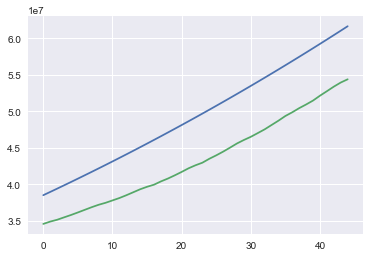

In [51]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE', mean_squared_error(svm_test_pred, y_test_confirmed))


### Total Covid-19 cases over time


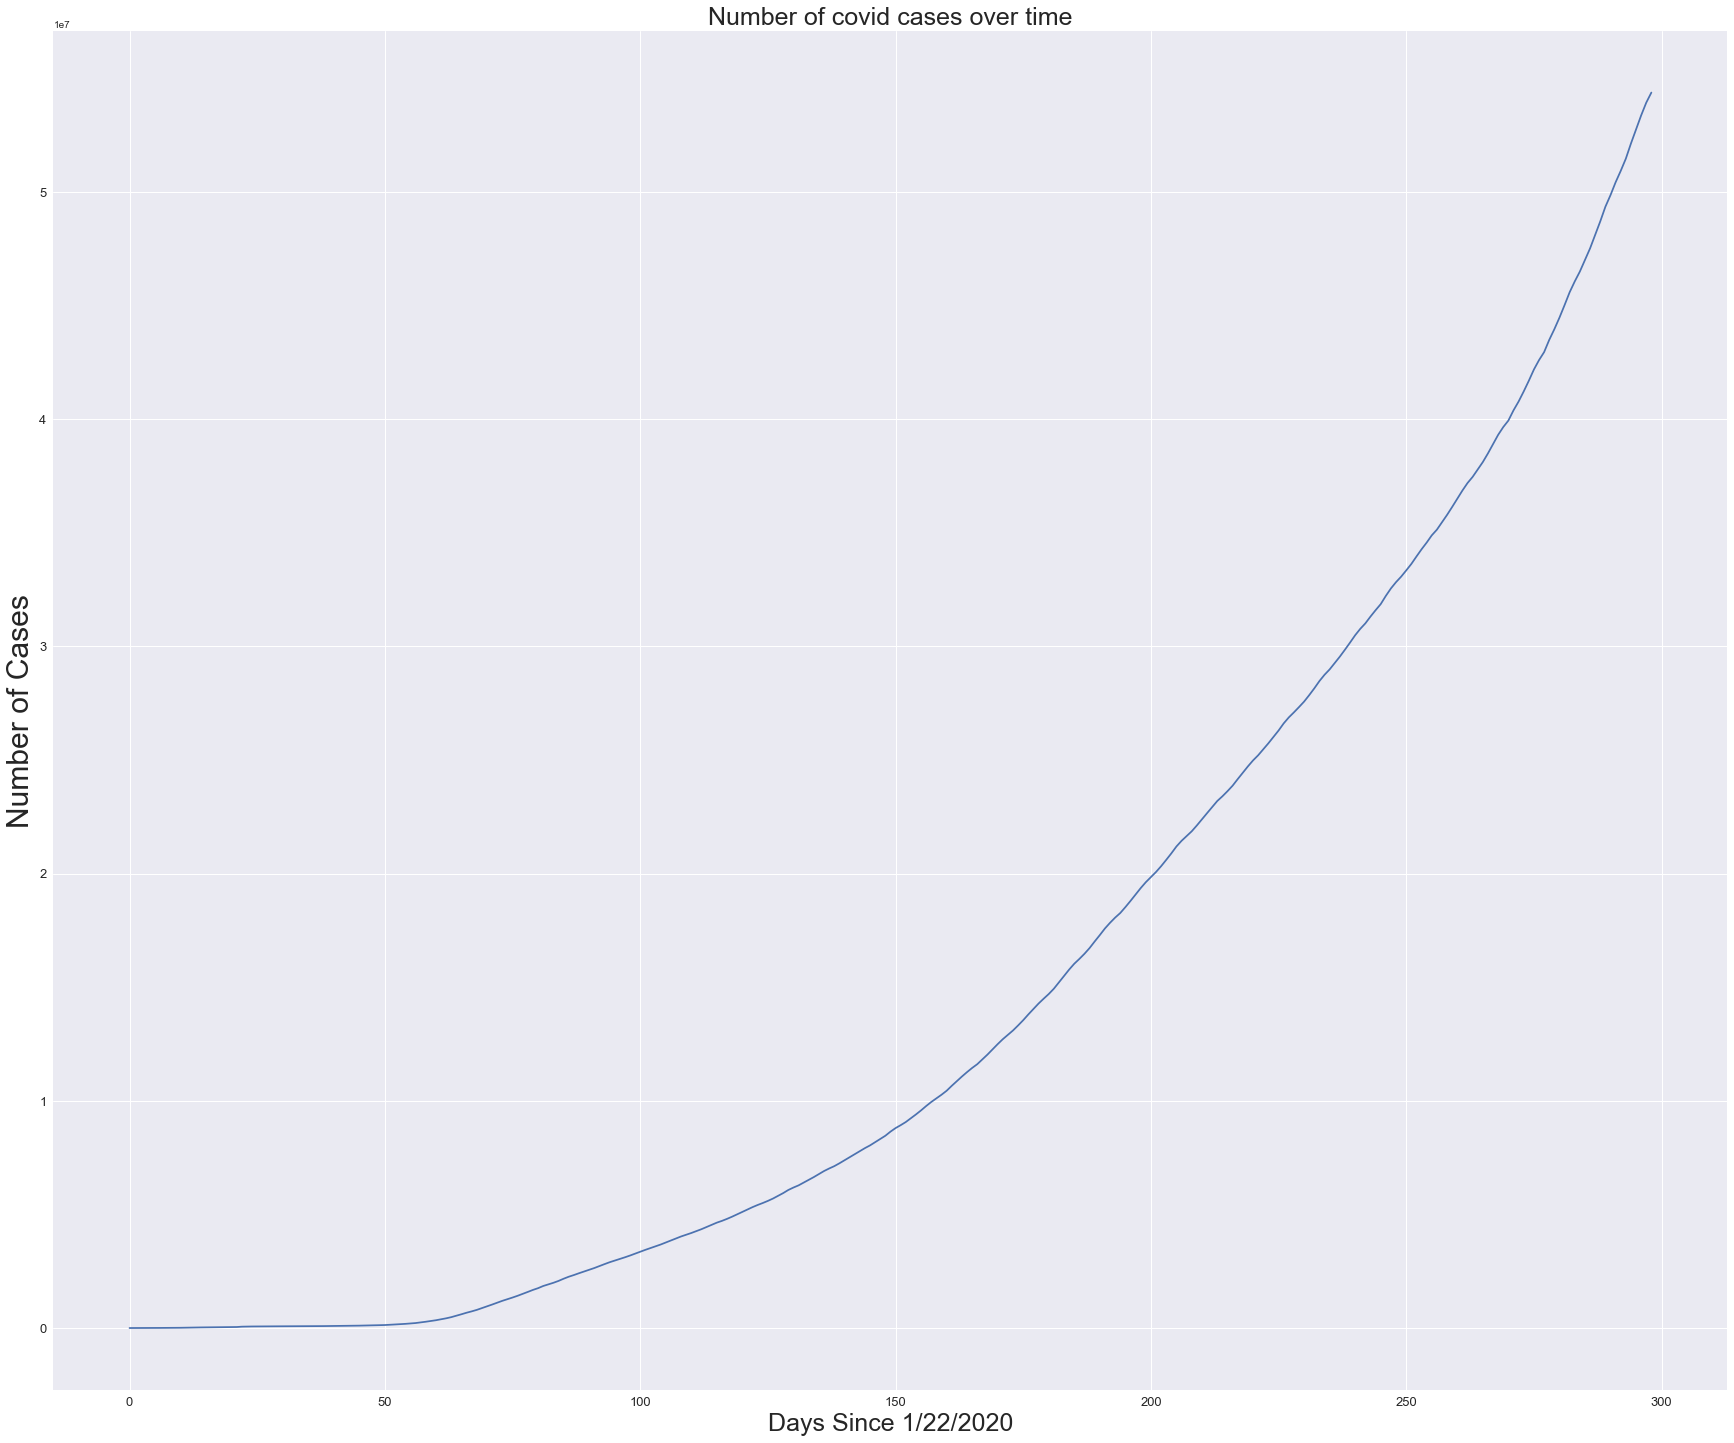

In [52]:
plt.figure(figsize=(30,25))
plt.plot(adjusted_dates,world_cases)
plt.title('Number of covid cases over time', size =25 )
plt.xlabel('Days Since 1/22/2020', size =25)
plt.ylabel('Number of Cases', size =30)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

### Confirmed cases vs Predicted cases Plot

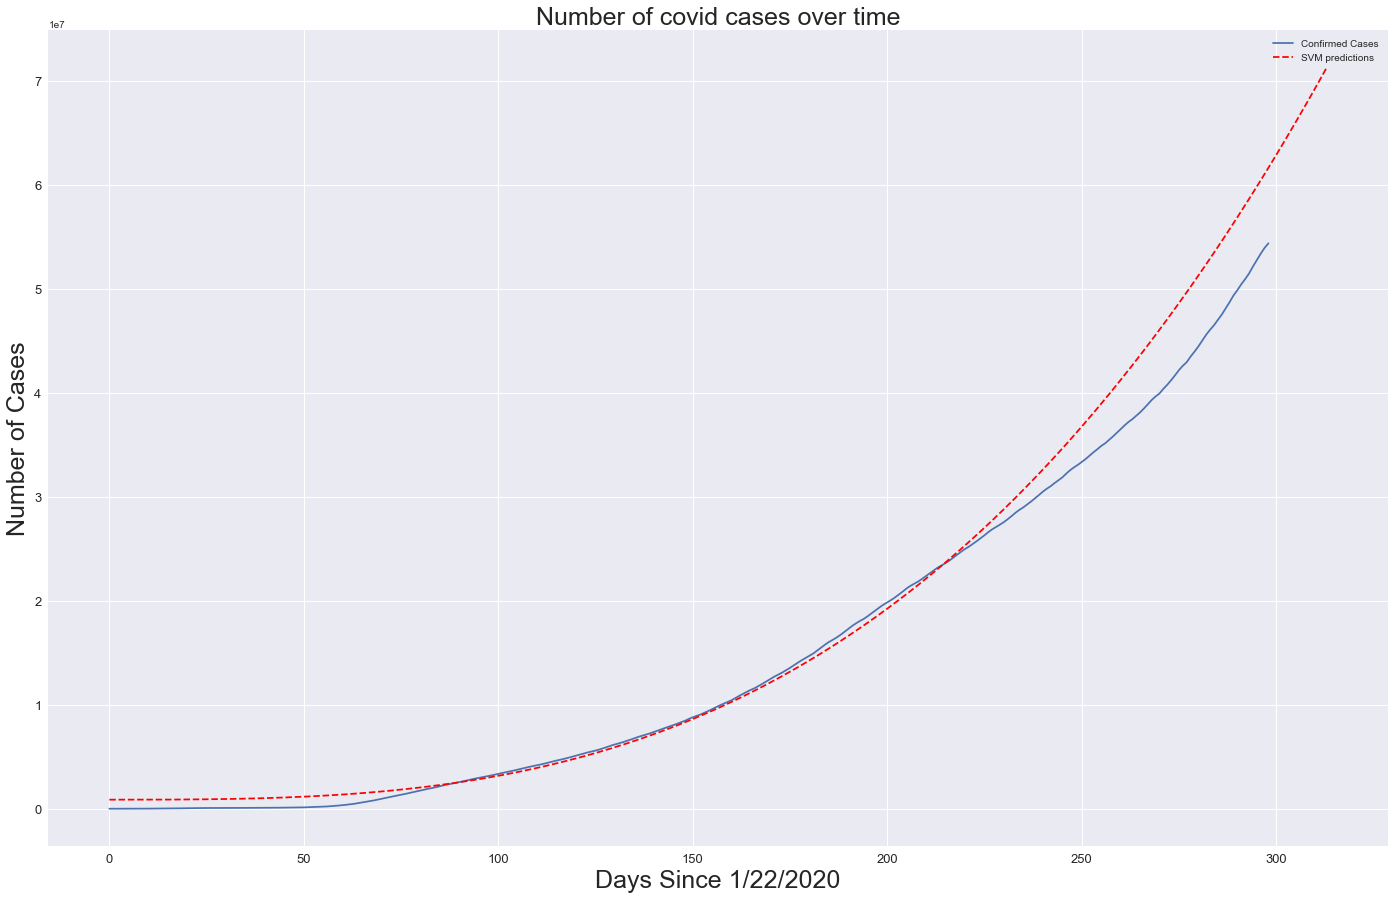

In [53]:
plt.figure(figsize=(24,15))
plt.plot(adjusted_dates,world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='red')
plt.title('Number of covid cases over time', size =25 )
plt.xlabel('Days Since 1/22/2020', size =25)
plt.ylabel('Number of Cases', size =25)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

### Predictions for the next 15 days using SVM

In [54]:
print('SVM future cases predictions : ')
set(zip(future_forecast_dates[-15:], svm_pred[-15:]))

SVM future cases predictions : 


{('11/16/2020', 62249193.927242145),
 ('11/17/2020', 62867072.49462496),
 ('11/18/2020', 63489084.017085895),
 ('11/19/2020', 64115242.28759371),
 ('11/20/2020', 64745561.07079683),
 ('11/21/2020', 65380054.11669527),
 ('11/22/2020', 66018735.18212496),
 ('11/23/2020', 66661618.16259371),
 ('11/24/2020', 67308716.68407808),
 ('11/25/2020', 67960044.56298433),
 ('11/26/2020', 68615615.72314058),
 ('11/27/2020', 69275443.74462496),
 ('11/28/2020', 69939542.52782808),
 ('11/29/2020', 70607925.77099214),
 ('11/30/2020', 71280607.2905234)}

### Predictions via Linear regression

In [55]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True ,fit_intercept = True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE :', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE :', mean_squared_error(test_linear_pred, y_test_confirmed))

MAE : 13675429.831438975
MSE : 204760468222463.7


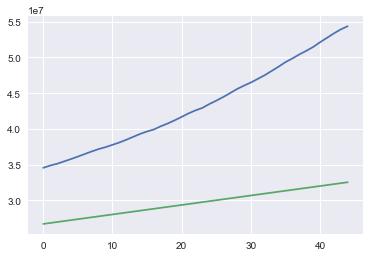

In [56]:
plt.plot(y_test_confirmed)

plt.plot(test_linear_pred)

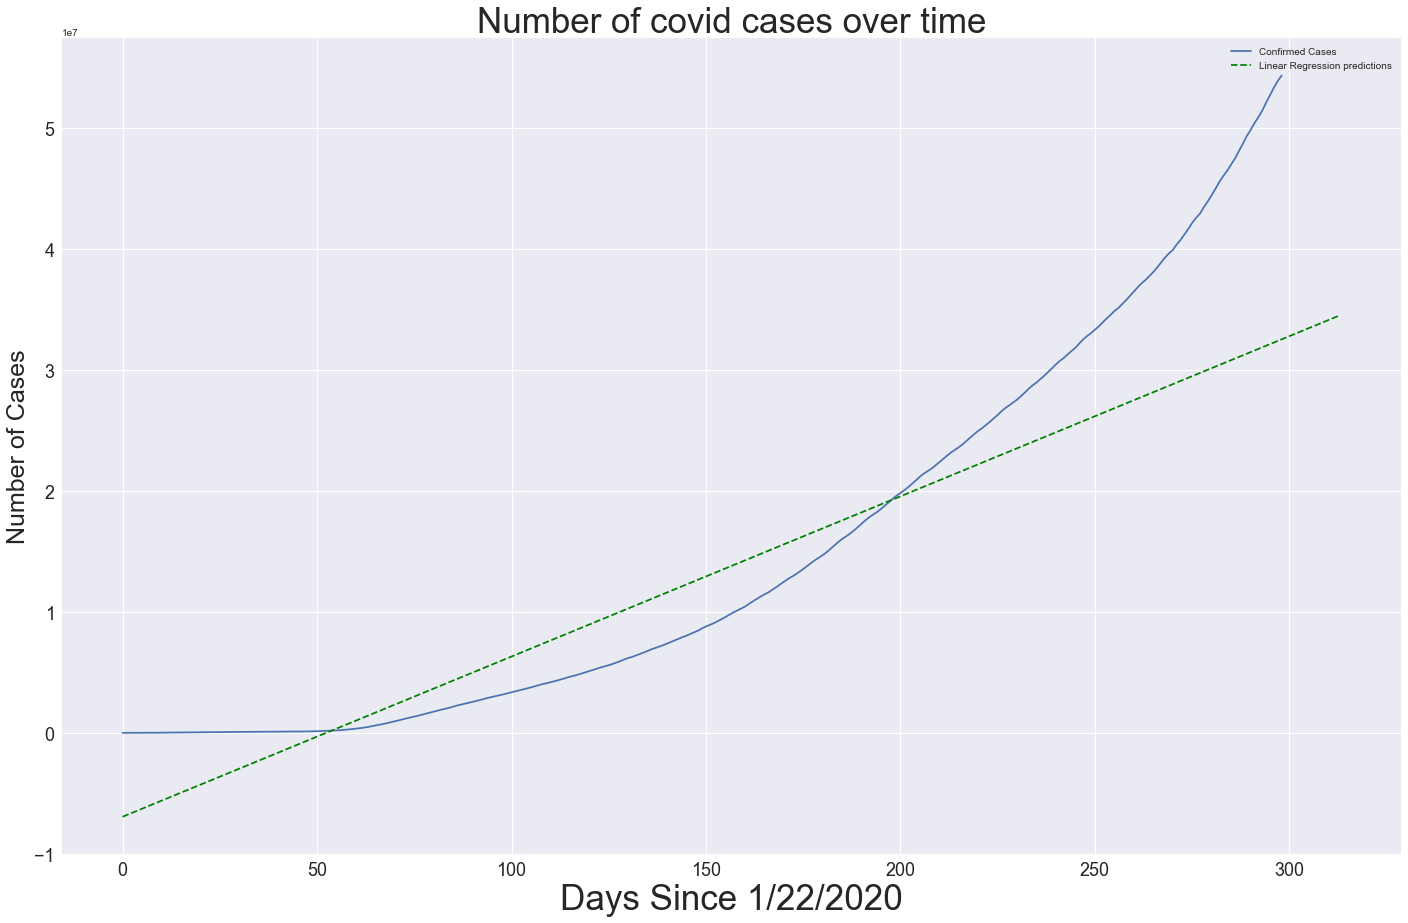

In [57]:
plt.figure(figsize=(24,15))
plt.plot(adjusted_dates,world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='green')
plt.title('Number of covid cases over time', size =35 )
plt.xlabel('Days Since 1/22/2020', size =35)
plt.ylabel('Number of Cases', size =25)
plt.legend(['Confirmed Cases', 'Linear Regression predictions'])
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

### Next 15 days predictions using Linear Regression

In [58]:
print('Linear regression future cases predictions: ')
print(linear_pred[-15:])

Linear regression future cases predictions: 
[[32680297.87266833]
 [32812806.33903049]
 [32945314.80539264]
 [33077823.27175479]
 [33210331.73811695]
 [33342840.2044791 ]
 [33475348.67084125]
 [33607857.13720341]
 [33740365.60356556]
 [33872874.06992771]
 [34005382.53628987]
 [34137891.00265202]
 [34270399.46901418]
 [34402907.93537633]
 [34535416.40173848]]


### Total deaths over time

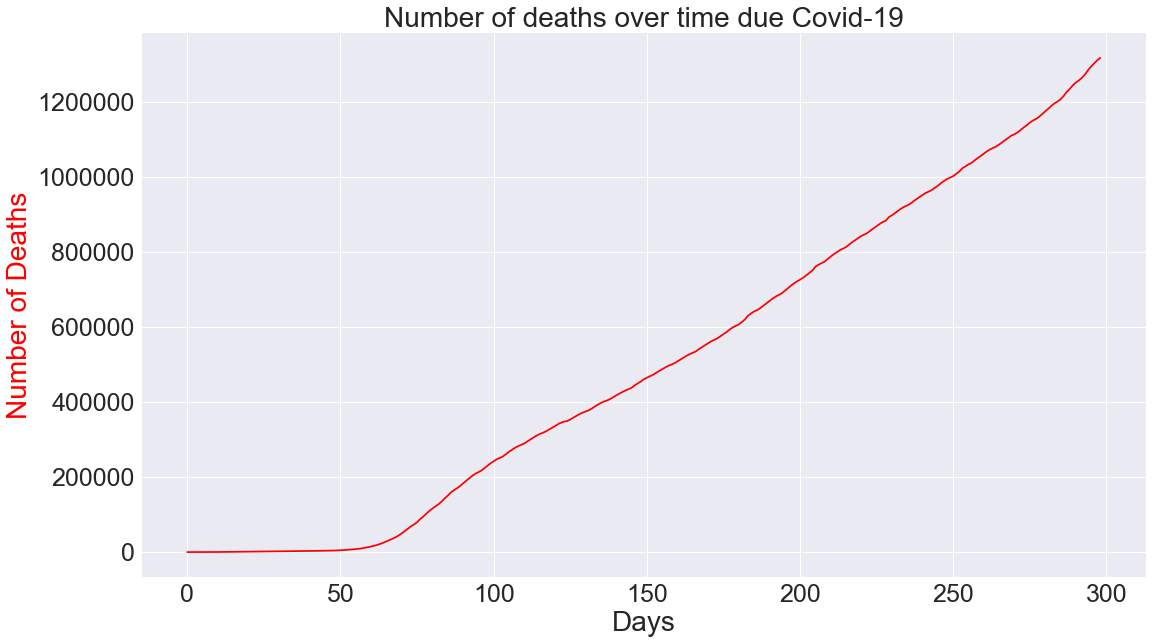

In [59]:
plt.figure(figsize=(18,10))
plt.plot(adjusted_dates, total_deaths, color= 'red')
plt.title('Number of deaths over time due Covid-19', size = 28)
plt.xlabel('Days', size=28)
plt.ylabel('Number of Deaths', size=28, color = 'red')
plt.xticks(size=25)
plt.yticks(size=25)
plt.show()

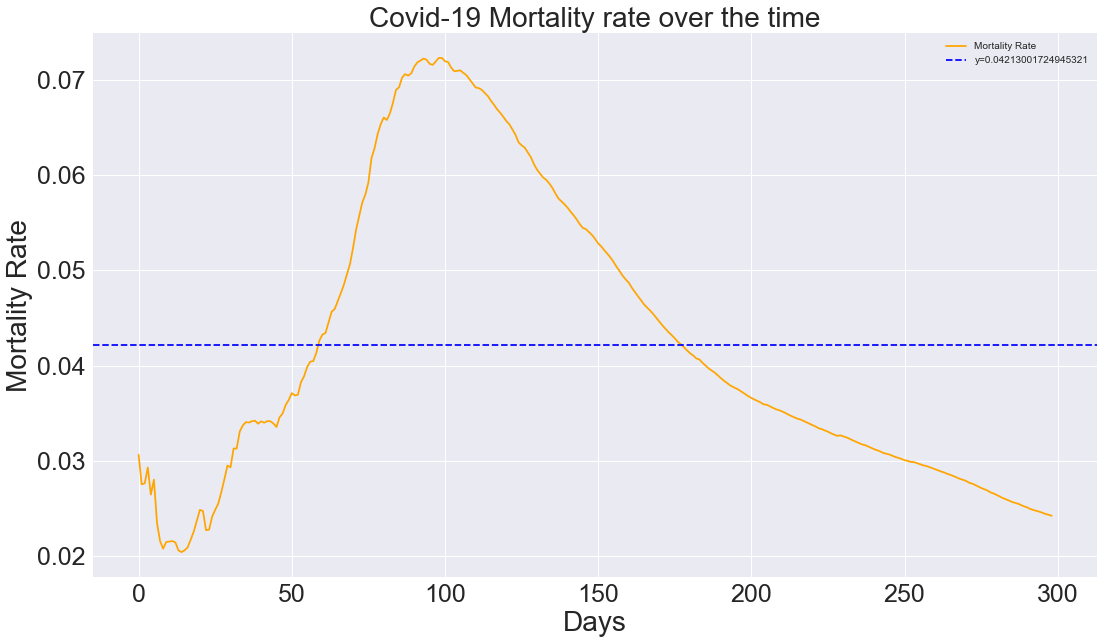

In [60]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(18,10))
plt.plot(adjusted_dates, mortality_rate, color = 'orange')
plt.axhline(y = mean_mortality_rate, linestyle='--', color='blue')
plt.title('Covid-19 Mortality rate over the time',size = 28)
plt.legend(['Mortality Rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Days', size = 28)
plt.ylabel('Mortality Rate', size = 28)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.show()

### Covid recovery over time

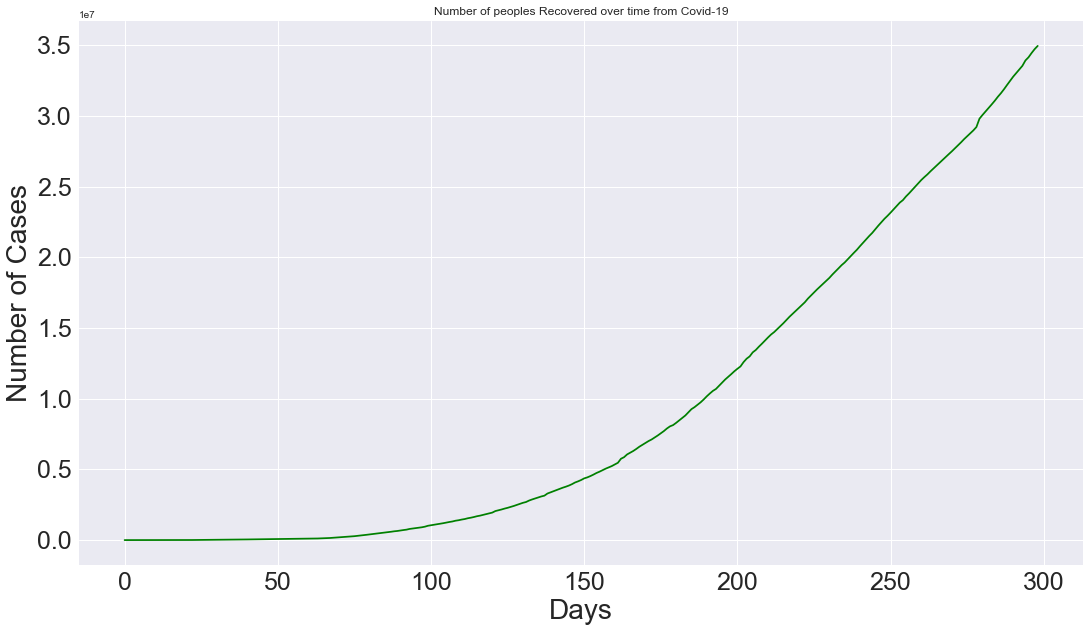

In [61]:
plt.figure(figsize=(18,10))
plt.plot(adjusted_dates,total_recovered, color='green')
plt.title('Number of peoples Recovered over time from Covid-19')
plt.xlabel('Days', size = 28)
plt.ylabel('Number of Cases', size = 28)
plt.xticks(size=25)
plt.yticks(size=25)
plt.show()

### Number of  Recovered & Deaths  plot 

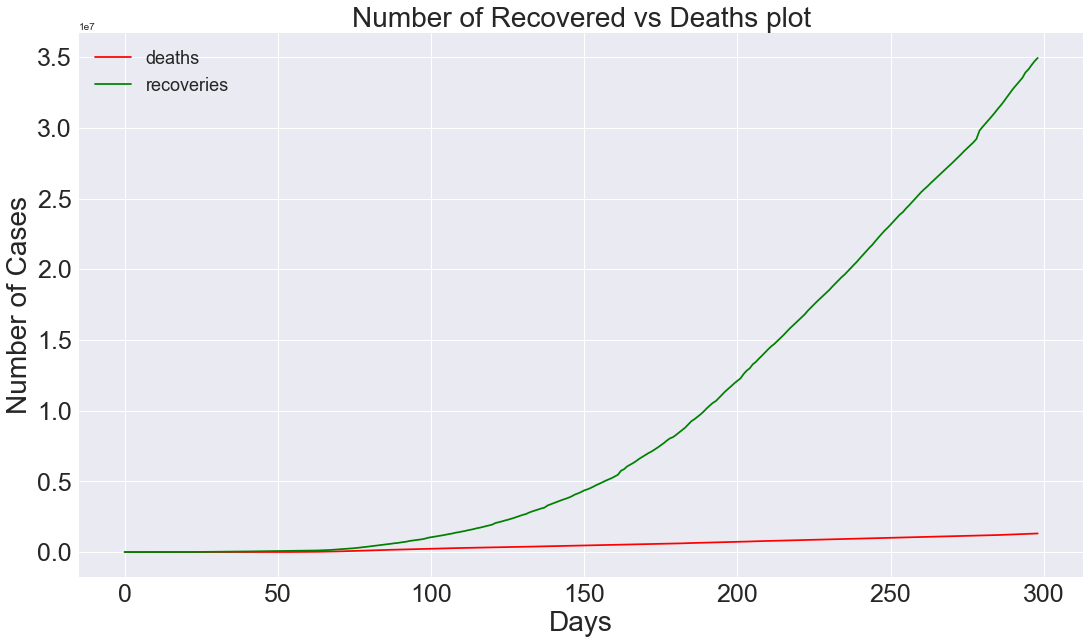

In [62]:
plt.figure(figsize=(18,10))
plt.plot(adjusted_dates, total_deaths, color ='red')
plt.plot(adjusted_dates, total_recovered, color ='g')
plt.legend(['deaths', 'recoveries'], loc='best', fontsize = 18)
plt.title('Number of Recovered vs Deaths plot', size=28)
plt.xlabel('Days', size=28)
plt.ylabel('Number of Cases', size = 28)
plt.xticks(size=25)
plt.yticks(size=25)
plt.show()


### Covid-19 Deaths vs  Recoveries Plot


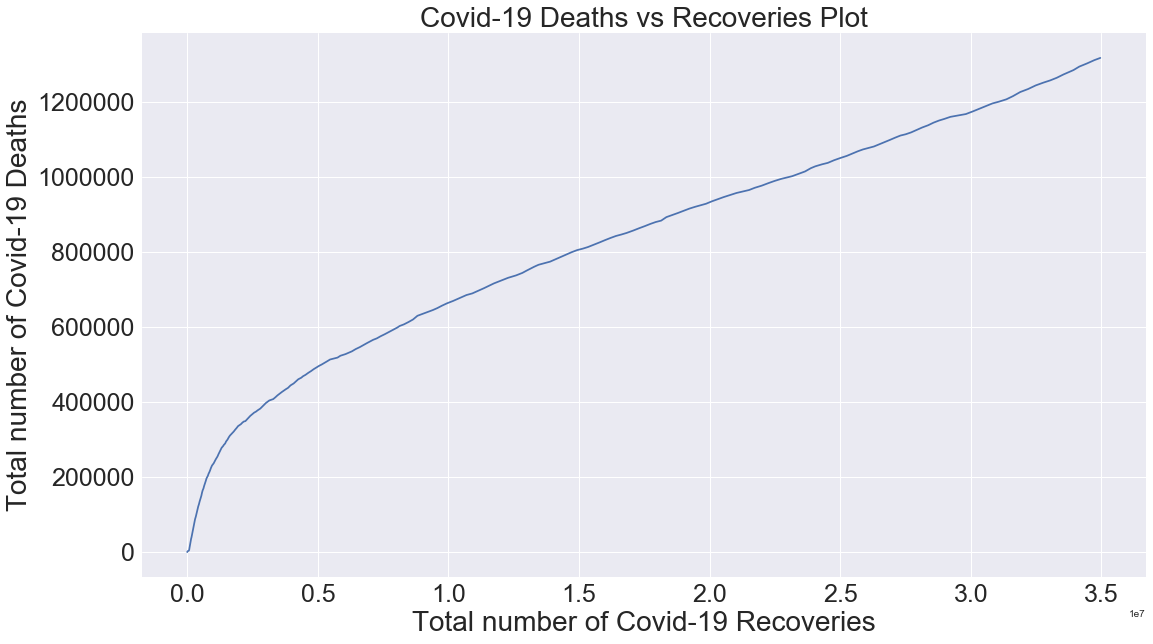

In [63]:
plt.figure(figsize=(18,10))
plt.plot(total_recovered, total_deaths)
plt.title('Covid-19 Deaths vs Recoveries Plot', size =28)
plt.xlabel('Total number of Covid-19 Recoveries', size=28)
plt.ylabel('Total number of Covid-19 Deaths', size=28)
plt.xticks(size=25)
plt.yticks(size=25)
plt.show()

# <p style="text-align: center;">Thank You 😊</p>